### Import pakietów

In [95]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Wczytanie i przygotowanie danych

In [96]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

110556593
39562616
84514582
96008085


In [97]:
product_id = input("Podaj kod produktu: ")

In [98]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,useful,unuseful,post_date,purchase_date
0,3422858,Użytkownik Ceneo,Polecam,5/5,"UWAGA, UWAGA do wszystkich zgłaszających probl...",[],[],57,7,2015-11-17 17:55:59,None
1,3529254,Marcin,Polecam,"4,5/5","Ogólnie spoko, chociaż telefon po wyjęciu z pu...",[],[przycisk home - trzeba mocno naciskać],3,0,2016-01-13 00:44:40,2015-12-27 14:12:05
2,6706897,zedi,Polecam,4/5,Wady Słaby dźwięk z głośnika głównego - z tyłu...,"[ekran nie do zbicia, wyświetlacza: design: ...","[bateria lądująca w godzine 100%, czas pracy n...",0,2,2018-03-14 00:45:39,None
3,3580458,Janek,Polecam,5/5,Smartphone szybki i stabilny. Super ekran doty...,[wyświetlacza: design: żywotność],[],37,16,2016-02-12 11:13:47,2016-01-25 12:30:40
4,3287614,maciej,Polecam,4/5,"Generalnie bardzo dobry smartfon, moim zdaniem...",[funkcjonalność],[],35,14,2015-08-21 14:25:23,None
...,...,...,...,...,...,...,...,...,...,...,...
127,3502307,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-29 18:45:09,None
128,3455136,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-04 22:52:58,None
129,3442558,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-27 13:16:18,None
130,3430751,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-21 13:41:11,None


In [99]:
opinions['stars'] = (opinions['stars']).apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
opinions["useful"] = opinions['useful'].astype(int)
opinions["unuseful"] = opinions['unuseful'].astype(int)

### Podstawowe statystyki

In [100]:
opinions_count = opinions.shape[0]
pros_count = opinions['pros'].astype(bool).sum()
cons_count = opinions['cons'].astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o['pros']) and bool(o['cons']), axis=1).sum()
average_stars = opinions['stars'].mean()
print(f'Liczba opinii o produkcie: {opinions_count}')
print(f'Liczba opinii z podaną listą zalet: {pros_count}')
print(f'Liczba opinii z podaną listą wad: {cons_count}')
print(f'Liczba opinii z podaną listą zalet i wad: {pros_cons_count}')
print(f'Średnia ocena produktu: {average_stars:.3}')

Liczba opinii o produkcie: 132
Liczba opinii z podaną listą zalet: 30
Liczba opinii z podaną listą wad: 14
Liczba opinii z podaną listą zalet i wad: 9
Średnia ocena produktu: 4.47


In [101]:
pros = opinions.pros.explode().dropna().value_counts()
cons = opinions.cons.explode().dropna().value_counts()
print(f'Lista unikatowych zalet: {pros}')
print(f'Lista unikatowych wad: {cons}')


Lista unikatowych zalet: pros
funkcjonalność                              20
wygląd                                       9
czas pracy na baterii                        6
łatwość obsługi                              6
bateria lądująca w godzine 100%              5
wododporność                                 5
wyświetlacza:  design:  żywotność            5
ekran nie do zbicia                          3
bateria dwa dni trzyma przy dość intensy     2
wady oprogramowania                          2
po pół roku użytkowania się zawiesza         1
przycisk home - trzeba mocno naciskać        1
Name: count, dtype: int64
Lista unikatowych wad: cons
bateria lądująca w godzine 100%             3
czas pracy na baterii                       3
słaba jakość dźwięku z głośniczka           3
wododporność                                3
funkcjonalność                              3
potrafi zamulac                             3
przycisk home - trzeba mocno naciskać       2
bateria dwa dni trzyma przy do

### Wykresy

In [104]:
recommendations = opinions['recommendation'].value_counts(dropna=False).reindex(["Nie polecam", "Polecam", None], fill_value=0)
recommendations

recommendation
Nie polecam      7
Polecam        114
None            11
Name: count, dtype: int64

<Axes: title={'center': 'Rozkad rekomendacji w opiniach o produkcie 39562616'}>

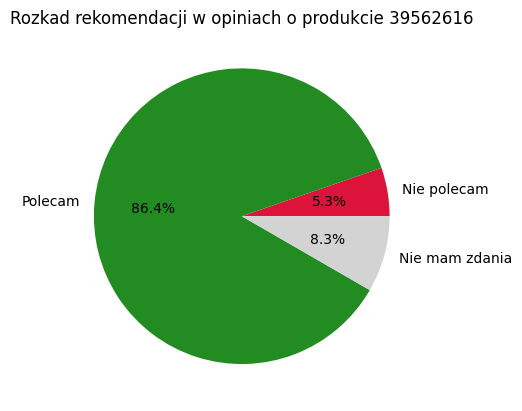

In [109]:
recommendations.plot.pie(
    label="",
    title=f"Rozkad rekomendacji w opiniach o produkcie {product_id}",
    labels = ["Nie polecam", "Polecam", "Nie mam zdania"],
    colors = ['crimson', 'forestgreen', 'lightgrey'],
    autopct = '%1.1f%%'
    )